<a href="https://colab.research.google.com/github/hojin99/aitest/blob/main/K%EC%B5%9C%EA%B7%BC%EC%A0%91%2C%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 준비



In [ ]:
!git push

fatal: could not read Username for 'https://github.com': No such device or address


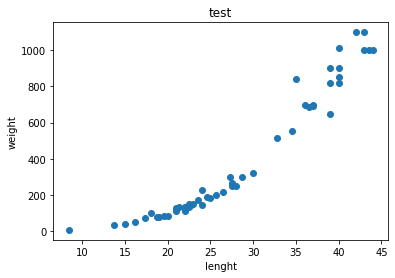

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )


plt.scatter(perch_length, perch_weight)
plt.title('test')
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

# 훈련세트 나누기

(42,) (42,)
(14,) (14,)
(42, 1) (42,)
(14, 1) (14,)


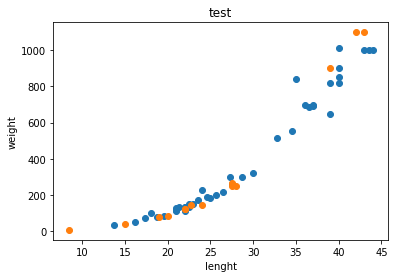

In [ ]:
from sklearn.model_selection import train_test_split

# random_state는 랜덤값을 고정하기 위한 역할, None이 아닌 상수는 고정이 됨
train_input, test_input, train_output, test_output = train_test_split(perch_length, perch_weight, random_state=None)

print(train_input.shape, train_output.shape)
print(test_input.shape, test_output.shape)

# sklearn을 위해 input은 2차원 배열로 변경 - reshape(-1,1) 에서 행을 -1로 두는 의미는 행은 열에 맞춰서 자동으로 reshape하라는 의미
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

print(train_input.shape, train_output.shape)
print(test_input.shape, test_output.shape)

plt.scatter(train_input, train_output)
plt.scatter(test_input, test_output)
plt.title('test')
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()


# 학습, 예측

In [ ]:
from sklearn.metrics import mean_absolute_error

knr = KNeighborsRegressor()
# 훈련
knr.fit(train_input, train_output)

# 예측
print(knr.score(train_input, train_output))
print(knr.score(test_input, test_output))

# 결정계수
test_predict = knr.predict(test_input)
mae = mean_absolute_error(test_output, test_predict)
print(mae)
print('----------------------------')

# 훈련 (네이버 개수 조정)
knr.n_neighbors = 3
knr.fit(train_input, train_output)

# 예측
print(knr.score(train_input, train_output))
print(knr.score(test_input, test_output))



0.9736032233147516
0.9765269011034043
40.32142857142857
----------------------------
0.9780570175307925
0.9772523133877328


# 과소적합, 과대적합 그래프로 확인

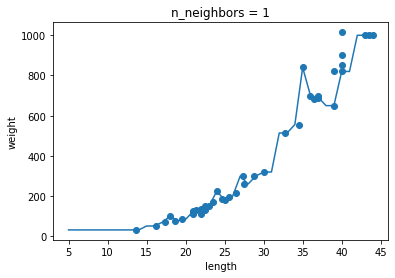

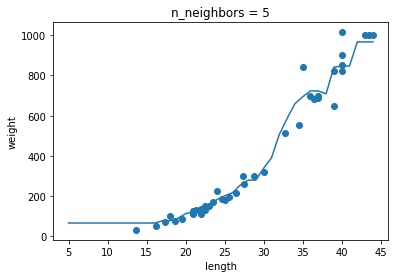

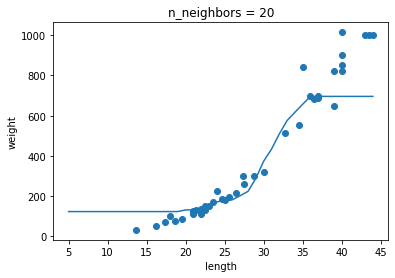

In [ ]:
# 네이터 개수가 너무 적으면 과대적합, 너무 많으면 과소접합 됨
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 20]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_output)
    # 지정한 범위 x에 대한 예측 구하기 
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_output)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))    
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

# 한계

[955.]


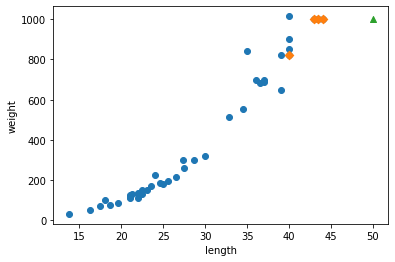

In [ ]:
# 가장 근접한 weight값으로 예측하기 때문에, 데이터가 없는 너무 큰 length에 대해서는 잘못 예측함
knr = KNeighborsRegressor(n_neighbors=4)
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_output)
print(knr.predict([[500]]))

# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_output)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_output[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1000, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 선형 회귀

[1198.88311242]
[37.36063993] -669.1488841139603


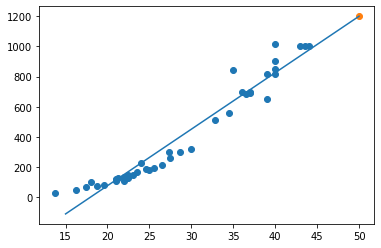

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_output)

lr.score(test_input, test_output)

print(lr.predict([[50]]))

# 기울기, 절편 
print(lr.coef_, lr.intercept_)

plt.scatter(train_input, train_output)
# plt.plot(x배열, y배열)
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter([50],[1198.8])

plt.show()


# 선형다항회귀

(42, 2) (14, 2)
[1490.20354751]
[  0.87845992 -15.04072588] 46.09004875662936


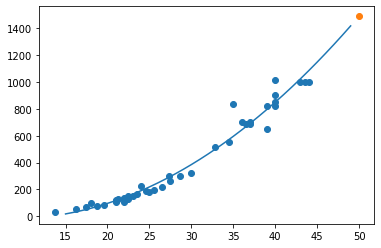

In [ ]:
train_poly = np.column_stack([train_input**2, train_input])
test_poly = np.column_stack([test_input**2, test_input])

print(train_poly.shape, test_poly.shape)

lr = LinearRegression()
lr.fit(train_poly, train_output)

# lr.score(test_poly, test_output)
print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

pp = np.arange(15,50)

plt.scatter(train_input, train_output)
# 2차 함수 그래프 그리기
plt.plot(pp, lr.coef_[0]*pp**2 + lr.coef_[1]*pp + lr.intercept_)
plt.scatter([50],[1490.2])

plt.show()

